# Analysis of Lahman Data

Normalize salaries based on avg for year

Count of normalized salary tresholds vs win% - by team by year

Sum of normalized salary vs win% - by team by year


## STEP 1: Import Packages

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## STEP 2: Read in data

In [2]:
batting_df = pd.read_csv('./data/core/Batting.csv',
                        delimiter=',',
                        usecols=['playerID','yearID','stint','teamID'])
batting_df.head(5)

,playerID,yearID,stint,teamID
0,abercda01,1871,1,TRO
1,addybo01,1871,1,RC1
2,allisar01,1871,1,CL1
3,allisdo01,1871,1,WS3
4,ansonca01,1871,1,RC1


In [3]:
people_df = pd.read_csv('./data/core/People.csv',
                        delimiter=',',
                        index_col=['playerID'],
                        usecols=['playerID','nameFirst','nameLast','birthYear'])
people_df.head(5)

,birthYear,nameFirst,nameLast
playerID,,,
aardsda01,1981.0,David,Aardsma
aaronha01,1934.0,Hank,Aaron
aaronto01,1939.0,Tommie,Aaron
aasedo01,1954.0,Don,Aase
abadan01,1972.0,Andy,Abad


In [4]:
salary_df = pd.read_csv('./data/core/Salaries.csv',
                        delimiter=',')
salary_df.head(5)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [5]:
teams_df = pd.read_csv('./data/core/Teams.csv',
                       delimiter=',',
                       usecols=['yearID','teamID','G','W'])
teams_df.head(5)

,yearID,teamID,G,W
0,1871,BS1,31,20
1,1871,CH1,28,19
2,1871,CL1,29,10
3,1871,FW1,19,7
4,1871,NY2,33,16


## STEP 3: Explore the data
### Average Salary by Year

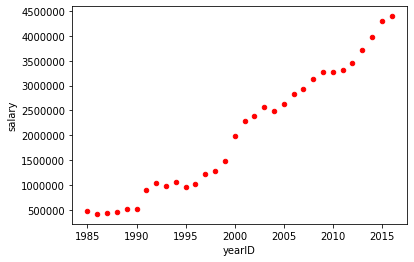

In [6]:
salary_by_year_df = salary_df.groupby(["yearID"], as_index=False)["salary"].mean()
salary_by_year_df.plot(kind='scatter',x='yearID',y='salary',color='red')
plt.show()

### Normalized Salary Distribution by Year

28294/40752 Rows have an associated salary = 69.4%

In [16]:
# Filter to some subset of years where we have salaries (1985 - 2016)
batting_filtered_df = batting_df[(batting_df.yearID>=1985) & (batting_df.yearID<=2016)]

# Join batting with people information, mean salaries by year, and the player's salary
batting_filtered_df = batting_filtered_df.join(people_df, on='playerID').join(salary_by_year_df.set_index('yearID'), on='yearID')
batting_filtered_df.rename(columns={'salary':'meanSalary'}, inplace=True)
batting_filtered_df = pd.merge(batting_filtered_df, salary_df,  how='left', left_on=['yearID','playerID'], right_on = ['yearID','playerID'])

# Calculate salary / avg salary
batting_filtered_df['normalizedSalary'] = batting_filtered_df.salary/batting_filtered_df.meanSalary

# Get rid of all rows without a salary
batting_filtered_df = batting_filtered_df[~batting_filtered_df.salary.isnull()]
batting_filtered_df

,playerID,yearID,stint,teamID_x,birthYear,nameFirst,nameLast,meanSalary,teamID_y,lgID,salary,normalizedSalary
2,ackerji01,1985,1,TOR,1958.0,Jim,Acker,4.762994e+05,TOR,AL,170000.0,0.356918
4,agostju01,1985,1,CHA,1958.0,Juan,Agosto,4.762994e+05,CHA,AL,147500.0,0.309679
5,aguaylu01,1985,1,PHI,1959.0,Luis,Aguayo,4.762994e+05,PHI,NL,237000.0,0.497586
8,alexado01,1985,1,TOR,1950.0,Doyle,Alexander,4.762994e+05,TOR,AL,875000.0,1.837080
10,allenne01,1985,1,SLN,1958.0,Neil,Allen,4.762994e+05,SLN,NL,750000.0,1.574640
...,...,...,...,...,...,...,...,...,...,...,...,...
40746,zieglbr01,2016,2,BOS,1979.0,Brad,Ziegler,4.396410e+06,ARI,NL,5500000.0,1.251021
40747,zimmejo02,2016,1,DET,1986.0,Jordan,Zimmermann,4.396410e+06,DET,AL,18000000.0,4.094250
40748,zimmery01,2016,1,WAS,1984.0,Ryan,Zimmerman,4.396410e+06,WAS,NL,14000000.0,3.184417
40749,zobribe01,2016,1,CHN,1981.0,Ben,Zobrist,4.396410e+06,CHN,NL,10500000.0,2.388312


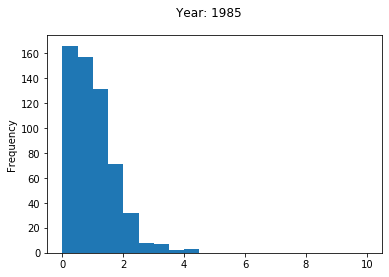

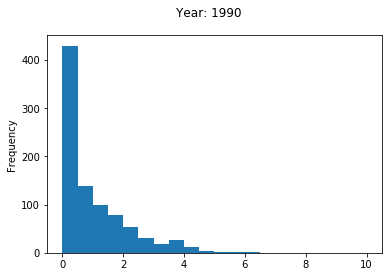

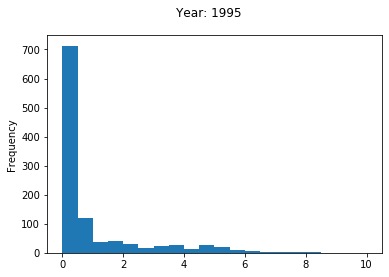

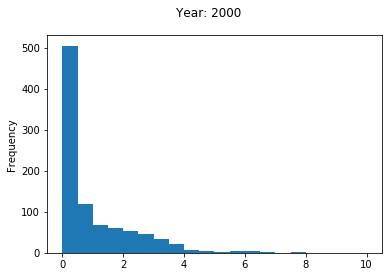

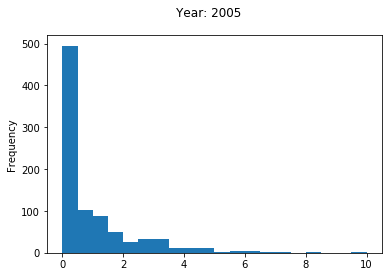

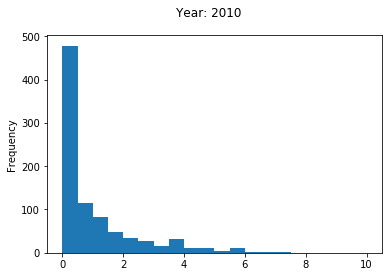

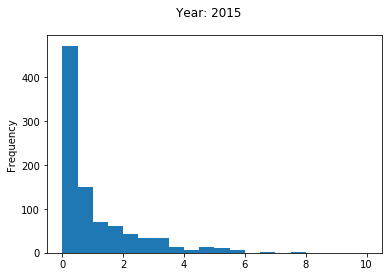

In [8]:
unique_years = list(batting_filtered_df['yearID'].unique())

for year in unique_years:
    if year % 5 == 0:
        batting_year_df = batting_filtered_df[batting_filtered_df.yearID==year]
        plt.figure()
        batting_year_df.normalizedSalary.plot.hist(bins=20, range=[0, 10])
        plt.suptitle("Year: " + str(year))

### Normalized Salary Distribution (%) vs Win% by Team

Text(0.5, 0.98, 'Years: 2000-2016')

<Figure size 432x288 with 0 Axes>

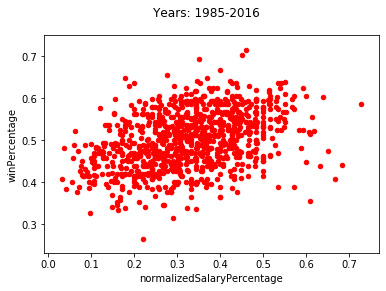

<Figure size 432x288 with 0 Axes>

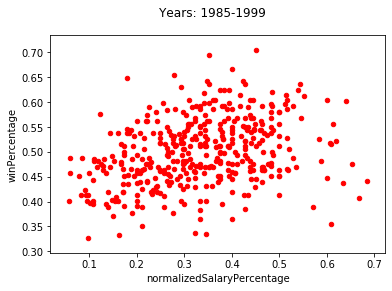

<Figure size 432x288 with 0 Axes>

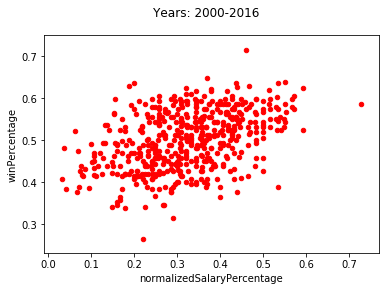

In [38]:
# scatterplot each team each year - % of players with normalized salary above/below X vs win %
normalized_cutoff = 1

# Count by year by team number of normalized salaries > X
year_team_df = batting_filtered_df[batting_filtered_df.normalizedSalary > normalized_cutoff].groupby(['yearID','teamID_x'], as_index=False).normalizedSalary.count()
year_team_count_df = batting_filtered_df.groupby(['yearID','teamID_x'], as_index=False).normalizedSalary.count().rename(index=str, columns={"normalizedSalary": "normalizedSalaryCount"})
year_team_df = pd.merge(year_team_df, year_team_count_df,  how='left', left_on=['yearID','teamID_x'], right_on = ['yearID','teamID_x'])
year_team_df['normalizedSalaryPercentage'] = year_team_df.normalizedSalary/year_team_df.normalizedSalaryCount

# Merge with teams to get wins and games, calculate win %
salary_win_df = pd.merge(year_team_df, teams_df,  how='left', left_on=['yearID','teamID_x'], right_on = ['yearID','teamID'])
salary_win_df['winPercentage'] = salary_win_df.W / salary_win_df.G

# Filter based on year or team
# salary_win_filtered_df = salary_win_df[salary_win_df.yearID >= 1985]

# Plot win percentage vs normalized salary count for every year and team
plt.figure()
salary_win_df.plot(kind='scatter',x='normalizedSalaryPercentage',y='winPercentage',color='red')
plt.suptitle("Years: 1985-2016")

salary_win_filtered_df = salary_win_df[(salary_win_df.yearID >= 1985) & (salary_win_df.yearID <= 1999)]
plt.figure()
salary_win_filtered_df.plot(kind='scatter',x='normalizedSalaryPercentage',y='winPercentage',color='red')
plt.suptitle("Years: 1985-1999")

salary_win_filtered_df = salary_win_df[(salary_win_df.yearID >= 2000) & (salary_win_df.yearID <= 2016)]
plt.figure()
salary_win_filtered_df.plot(kind='scatter',x='normalizedSalaryPercentage',y='winPercentage',color='red')
plt.suptitle("Years: 2000-2016")

### Normalized Salary Distribution (Mean) vs Win% by Team

<Figure size 432x288 with 0 Axes>

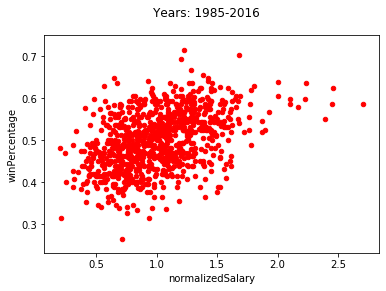

<Figure size 432x288 with 0 Axes>

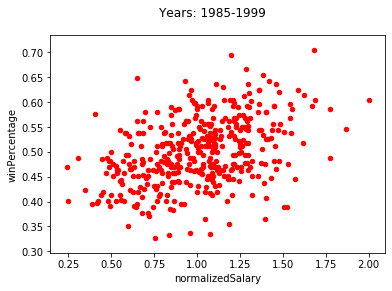

<Figure size 432x288 with 0 Axes>

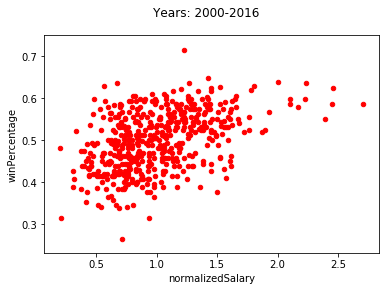

In [37]:
# Average normalized salaries by year by team
year_team_sum_df = batting_filtered_df.groupby(['yearID','teamID_x']).normalizedSalary.mean()

# Merge with teams to get wins and games, calculate win %
salary_sum_win_df = pd.merge(year_team_sum_df, teams_df,  how='left', left_on=['yearID','teamID_x'], right_on = ['yearID','teamID'])
salary_sum_win_df['winPercentage'] = salary_sum_win_df.W / salary_sum_win_df.G

# Filter based on year or team and plot
plt.figure()
salary_sum_win_df.plot(kind='scatter',x='normalizedSalary',y='winPercentage',color='red')
plt.suptitle("Years: 1985-2016")

salary_sum_win_filtered_df = salary_sum_win_df[(salary_sum_win_df.yearID >= 1985) & (salary_sum_win_df.yearID <= 1999)]
plt.figure()
salary_sum_win_filtered_df.plot(kind='scatter',x='normalizedSalary',y='winPercentage',color='red')
plt.suptitle("Years: 1985-1999")

salary_sum_win_filtered_df = salary_sum_win_df[(salary_sum_win_df.yearID >= 2000) & (salary_sum_win_df.yearID <= 2016)]
plt.figure()
salary_sum_win_filtered_df.plot(kind='scatter',x='normalizedSalary',y='winPercentage',color='red')
plt.suptitle("Years: 2000-2016")
plt.show()